## We are given building dataset and we are requiured to predict the building score

In [21]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

### Loading our dataset

In [22]:
building_data = pd.read_csv('data/building_data.csv')

In [23]:
print (building_data.shape, '\n') #Dataset has 11,746 rows and 60 columns
building_data.head(5)

(11746, 60) 



,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

#### We will like at least understand our data so that we can understand the target we want to predict. Our data has 60 columns which we don't know what they mean or what they represent.

#### Thus, the definition of Energy star score is a 1% - 1005 building ranking, based on self-reported energy usage for a particular year.


## Data cleaning 

In [24]:
# Checking dataframe data type
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [25]:
# If you look at the result we got above, you will notice that there are some columns like ite EUI that have a data type of
#object. 

#If we work with this data as it is it will be difficult for us to do analysis with Pandas for non-numeric data

#Therefore, lets convert the data types to the right data types

building_data = building_data.replace({'Not Available': np.nan})

# Loop through the columns
for col in list(building_data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        
        # Convert the data type to float
        building_data[col] = building_data[col].astype(float)
        


In [26]:
# Now let's check if we were successful
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [27]:
#check Dataset Statistics 
building_data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0



### Dealing with missing data

In [28]:
# Am going to create a function for missing data
# The following is a function that calculates the number of missing values and the percentage of the total values 
# that are missing for each column.

# Function to calculate missing values by column
def missing_values_function(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [29]:
missing_values_function(building_data)

This dataset has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [30]:
# From the result we can see we have a lot of columns that have missing data.
# We will want to set a rule where we will drop all columns that have over 50% missing data since they will not have much help

# Get the columns with > 50% missing
missing_df_data = missing_values_function(building_data);
missing_columns = list(missing_df_data[missing_df_data['% of Total Values'] > 50].index)
print('\n','We will remove %d columns.' % len(missing_columns))

This dataset has 60 columns.
There are 46 columns that have missing values.

 We will remove 11 columns.


In [31]:
# Drop the columns
building_data = building_data.drop(columns = list(missing_columns))

In [32]:
# Lets confirm if everything checks out. 
missing_values_function(building_data)

This dataset has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


In [33]:
# Let us confirm if our columns have reduced to 49
building_data.shape

(11746, 49)

### Explaratory Data Analysis (EDA)

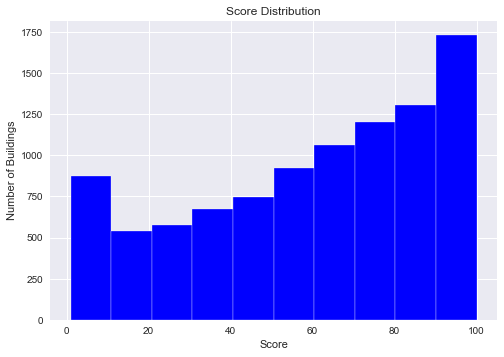

In [34]:
# We are focused energy score since it is our target value

#Plot a histogram using seaborn
figsize(8, 8)

# Rename the score 
building_data = building_data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('seaborn')
plt.hist(building_data['score'].dropna(), color = 'blue');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Score Distribution');

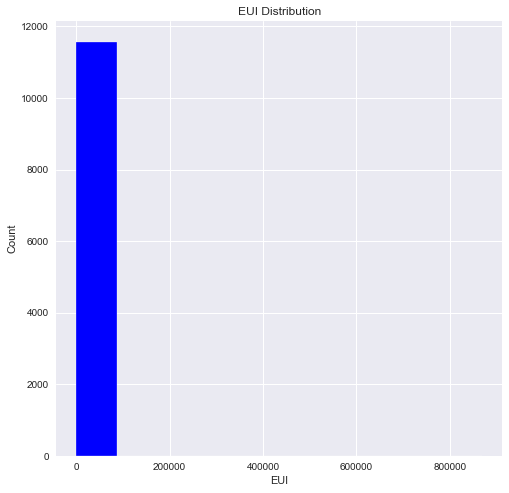

In [35]:
#From the result above it seems there are some score which are 100%. There were some people who were honest.

#Since Energy Use Intensity, is not self-reported, this might give us a more accurate view of energy use. It is calculated as 
#total energy divided by square footage of the building.
figsize(8, 8)
plt.hist(building_data['Site EUI (kBtu/ft²)'].dropna(), color = 'blue');
plt.xlabel('EUI'); 
plt.ylabel('Count'); plt.title('EUI Distribution');

#### From the result above it seems we have outliers and some buildings are heavily skewed. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.


In [36]:
# Before we deal with outliers, lets now study EUI more

building_data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [37]:
building_data['Site EUI (kBtu/ft²)'].dropna().sort_values().head()

11391    0.0
26       0.0
25       0.0
136      0.0
137      0.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [38]:
building_data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail() #Mmh seems 8068 really does use alot of electricity. 

8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [40]:
# Let us see this record that uses a lot of electricity
building_data.loc[building_data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [41]:
# Let us now work on outliers and remove them

# Calculate first and third quartile
first_quartile = building_data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = building_data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers

#Rule of thumb: On the low end, an extreme outlier is below, 'First Quartile−3∗Interquartile Range'
#On the high end, an extreme outlier is above, 'Third Quartile+3∗Interquartile Range'

building_data = building_data[(building_data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (building_data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]


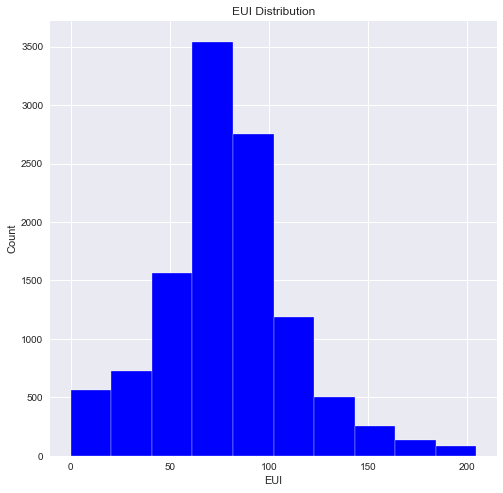

In [42]:
#Let us now see if we have removed outliers using histogram

figsize(8, 8)
plt.hist(building_data['Site EUI (kBtu/ft²)'].dropna(), color = 'blue');
plt.xlabel('EUI'); 
plt.ylabel('Count'); plt.title('EUI Distribution');



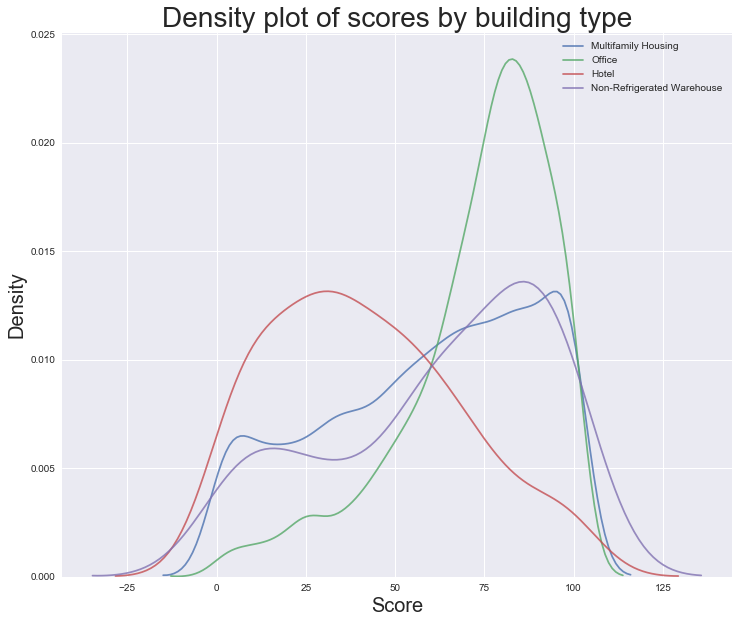

In [43]:
#Seems we have taken care of the outlier problem with the about figure taking a gaussian distribution with a positive skew. 


#Lets now go back to looking for relationships between score and other variables. 
#In order to look at the effect of categorical variables on the score, 
#we can make a density plot colored by the value of the categorical variable. 

#Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. 
#If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class. 
#The first plot we will make shows the distribution of scores by the property type. 
#In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset.


# Create a list of buildings with more than 100 measurements
types = building_data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = building_data[building_data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density plot of scores by building type', size = 28);

#We can see that the building type has an effect on the score. We will include this feature on our model. 
#As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model. 



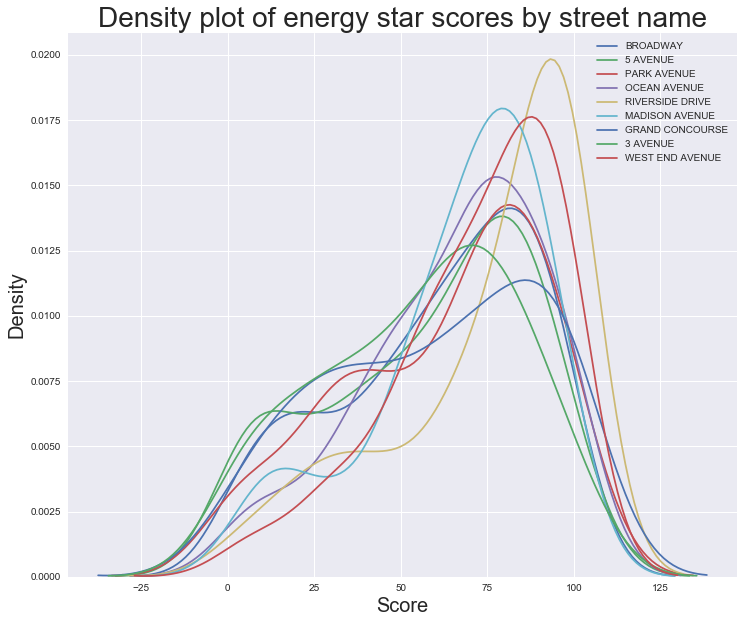

In [44]:
# Using the same code as above let us examine another variable

# Create a list of street_name with more than 100 observations
street_name = building_data.dropna(subset=['score'])
street_name = street_name['Street Name'].value_counts()
street_name = list(street_name[street_name.values > 100].index)

# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for street_name in street_name:
    # Select the building type
    subset = building_data[building_data['Street Name'] == street_name]
    
    # Density plot of scores
    sns.kdeplot(subset['score'].dropna(),
               label = street_name);
    
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density plot of energy star scores by street name', size = 28);

#Mmmh seems there is a little bit of influence from Street name. 
#Lets try out one last categorical variable; Borough (an administrative center like a district)

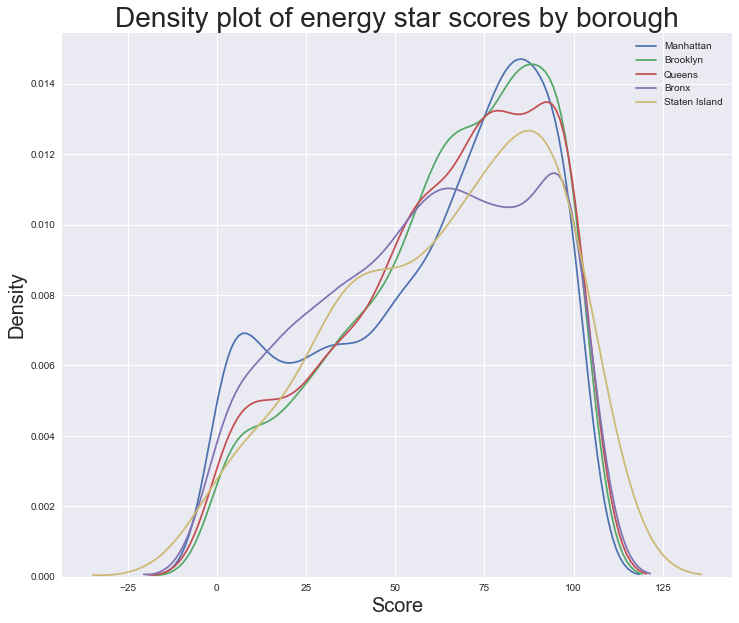

In [45]:
# Create a list of boroughs with more than 100 observations
boroughs = building_data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = building_data[building_data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density plot of energy star scores by borough', size = 28);

#Mmmh the influence of these districts do not seem much. 

In [46]:
# We will need to do this to all columns and this can be a lot of work since we have many categorical columns. 
# We can opt to use  Pearsons Correlation Coefficient.

# Find all correlations and sort 
correlations_data = building_data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: score, dtype: float64 

Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property

The closer corr is to zero, the weaker the linear relationship. 

Positive corr values indicate a positive correlation, where the values of both variables tend to increase together.

Negative corr values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score.

In [47]:
# Select the numeric columns
numeric_subset = building_data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['square_root' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = building_data[['Borough', 'Street Name', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without a score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
# Display most negative correlations
print(correlations.head(10), '\n')

# Display most positive correlations
print(correlations.tail(10))

Site EUI (kBtu/ft²)                                   -0.723864
Weather Normalized Site EUI (kBtu/ft²)                -0.713993
square_rootSite EUI (kBtu/ft²)                        -0.699817
square_rootWeather Normalized Site EUI (kBtu/ft²)     -0.689019
square_rootWeather Normalized Source EUI (kBtu/ft²)   -0.671044
square_rootSource EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)              -0.645542
Source EUI (kBtu/ft²)                                 -0.641037
log_Source EUI (kBtu/ft²)                             -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)          -0.620329
Name: score, dtype: float64 

Borough_Brooklyn                    0.050486
Street Name_RIVERSIDE DRIVE         0.053629
log_Community Board                 0.055495
Community Board                     0.056612
square_rootCommunity Board          0.058029
square_rootCouncil District         0.060623
log_Council District                0.061101
Council Distric

Text(0.5, 1, 'Score vs Site EUI')

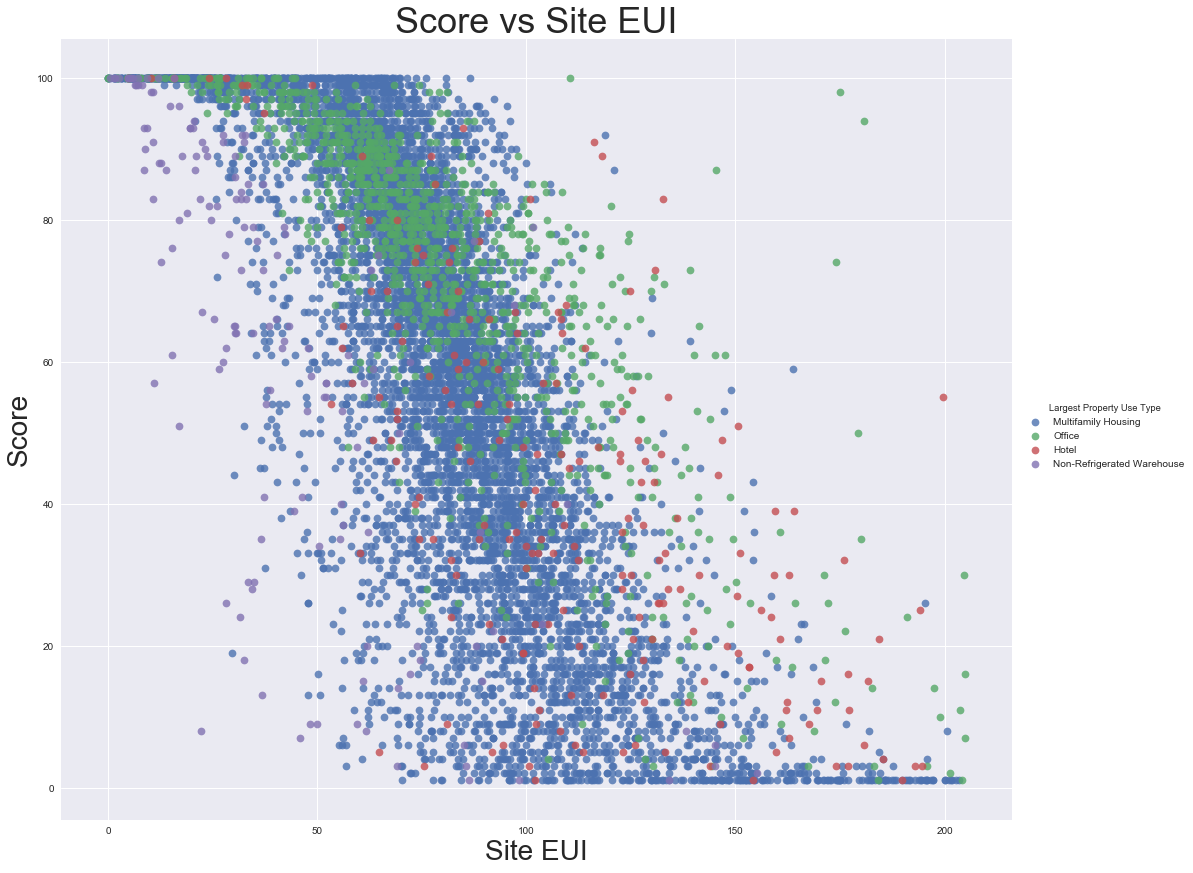

In [49]:
# We can use scatter plot to plot a graph for most significant correlation (in terms of absolute value) in the
# dataset which is Site EUI (kBtu/ft^2).
# We can color the graph by the building type to show how that affects the relationship

figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = building_data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Score', size = 28)
plt.title('Score vs Site EUI', size = 36)

# From the result there is a clear negative relationship between the Site EUI and the score.

Now on to Feature Engineering and Feature Selection

For feature engineering we will:
    - Select only the numerical variables and two categorical variables (borough and property use type)
    - Add in the log transformation of the numerical variables
    - One-hot encode the categorical variables
    
For feature selection, we will:
    - Remove collinear features

In [64]:
#We select the numeric features, adds in log transformations of all the numeric features, 
#selects and one-hot encodes the categorical features, and joins the sets of features together. 

# Copy the original data
features = building_data.copy()

# Select the numeric columns
numeric_subset = building_data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = building_data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape #We result to have 11,319 buildings and 110 columns with score inclusive.


C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9968')

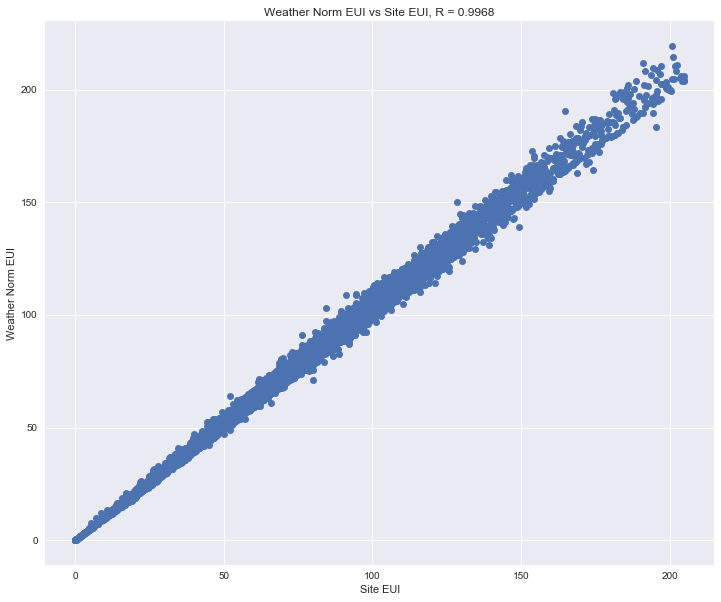

In [65]:

#Not all of these features are likely to be important for predicting the score, 
#and several of these features are also redundant because they are highly correlated. E.g.,...

plot_data = building_data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(building_data[['Weather Normalized Site EUI (kBtu/ft²)',
                                                                        'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])

In [71]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = [#'Weather Normalized Source EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [72]:
# Remove the collinear features above a specified correlation coefficient (0.6)
features = remove_collinear_features(features, 0.6)


C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [73]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 66)

In [74]:
#Splitting Data into training and testing sets

# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 66)
(9461, 66)


In [75]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 65)
(2839, 65)
(6622, 1)
(2839, 1)


In [76]:
#Mean absolute error

#This function calculates mean absoulute error between true values and predictions
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [77]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


In [79]:
#Save the data
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

## Machine Learning

In [99]:
# Input missing values and scale values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import MinMaxScaler

#Machine Learning aligortithms 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [100]:
# Reading in the data we saved into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 65)
Testing Feature Size:   (2839, 65)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


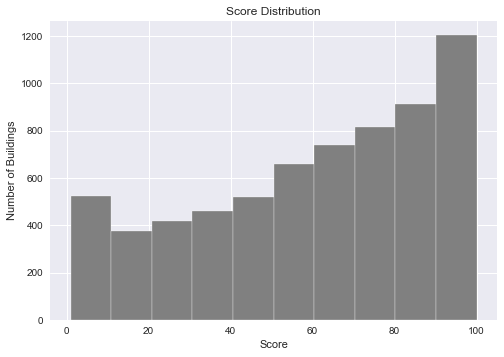

In [101]:
# Let us see again how energy score distribution looks like
# Histogram of the Energy Star Score
plt.style.use('seaborn')
plt.hist(train_labels['score'].dropna(), color = 'grey');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Score Distribution');

In [102]:
# dealing with missing data

#From above, we dealt with missing values by removing features with more than 50% of values missing. In this part, we will focus on filling
#on the other missing values by the process called imputation. 

#Creating an imputer object with a median filling strategy
imputer = SimpleImputer(strategy = 'median')

#Training on the training features
imputer.fit(train_features)

#Transforming both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [103]:
#Normalize features
#Lets normalize the features so that the different units do not affect the algorithms. While algorithms such as 
#Linear Regression and Random Forest do not require feature scaling, others such as KNN and SVM require because they 
#account for euclidean distance.

#Creating a scaler object with a range of 0 - 1
scaler = MinMaxScaler(feature_range = (0, 1))

#Fit on the training data
scaler.fit(X)

#Transform both the training and teating data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

#Converting y to one-dimensional array
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [104]:
#Calculating the Mean Absolute Error using a Funciton
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

#Training, testing and evaluating a model
def train_test_evaluate(model):
    
    #Train
    model.fit(X,y)
    
    #Test
    model_pred = model.predict(X_test)
    
    #Evaluate
    model_mae = mae(y_test, model_pred)
    
    #Return performance metric
    return model_mae

In [105]:
#Linear Regression
lr = LinearRegression()

lr_mae = train_test_evaluate(lr)

print ('Linear Regression Mean Absolute Error: %0.4f' %lr_mae, '\n')

#Support Vector Machines
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = train_test_evaluate(svm)

print ('SVM Mean Absolute Error: %0.4f' %svm_mae, '\n')

#Random Forest
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = train_test_evaluate(random_forest)

print ('Random Forest Mean Absolute Error: %0.4f' %random_forest_mae, '\n')

#Gradient Boosted Machines
gradient_boosted = GradientBoostingRegressor(random_state = 60)
gradient_boosted_mae = train_test_evaluate(gradient_boosted)

print ('Gradient Boosted Regression Mean Absolute Error: %0.4f' %gradient_boosted_mae, '\n')

#K-Nearest Neighbours                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = train_test_evaluate(knn)

print ('K Nearest Neighbors Mean Absolute Error: %0.4f' %knn_mae)

Linear Regression Mean Absolute Error: 13.4387 

SVM Mean Absolute Error: 10.7007 

Random Forest Mean Absolute Error: 9.5384 

Gradient Boosted Regression Mean Absolute Error: 9.9993 

K Nearest Neighbors Mean Absolute Error: 12.6954


Text(0.5, 1.0, 'Model Comparison on Test MAE')

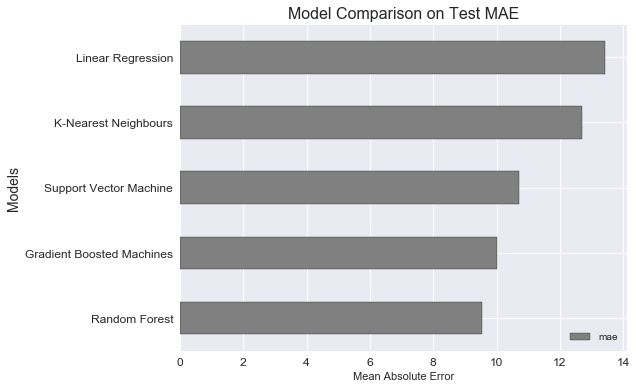

In [108]:
plt.style.use('seaborn')
figsize(8, 6)

#A dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'Support Vector Machine', 
                                           'Random Forest', 
                                           'Gradient Boosted Machines', 'K-Nearest Neighbours'],
                                'mae': [lr_mae, svm_mae, random_forest_mae, gradient_boosted_mae, knn_mae]})

#Horizontal bar chart of MAE
model_comparison.sort_values('mae', ascending = True).plot(x = 'model', 
                                                           y = 'mae', 
                                                           kind = 'barh', 
                                                           color = 'grey', 
                                                           edgecolor = 'black')

#Plot formatting
plt.ylabel('Models', size = 14) 
plt.yticks(size = 12)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test MAE', size = 16)

#We can see that there is a use for ML because all the models significantly outperform the baseline. 


In [109]:
#Model Optimization

#In ML, optimizing a model means finding the best set of hyperparameters for a particular problem. 

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [110]:
# Creating the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Setting up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [111]:
#Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.2min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             